### **Serie Temporal Modelo ARIMA**

#**Modelos ARIMA**


Modelos ARIMA, su nombre se debe a que es un modelo autoregresivo y media movil es decir el modelo se constituye de un componente a partir de observaciones de periodos pasado y el promedio en una ventana del tiempo. 

Usaremos como datos los valores de las acciones de la criptomoneda bitcoin.



In [24]:
import pandas as pd
import matplotlib.pyplot as plt

##**Leer conjunto de datos**

Como se mencionó la base de datos contiene información sobre el precio de la criptomoneda Bitcoin y Dash, datos diarios entre el 2013 y el 2018 con la siguiente información:

 

*   Open: precio de apertura
*   High: máximo precio tranzado 
*   Low: mínimo precio tranzado
*   Close: precio de cierre 
*   Volume: Dinero tranzado
*   Market Cap: Capital de la criptomoneda en dolares.

In [3]:
bitcoin = pd.read_csv("bitcoin_price.csv",parse_dates=['Date'])
bitcoin = bitcoin.set_index('Date')
bitcoin.sort_index(inplace=True)
bitcoin.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


In [4]:
bitcoin.tail()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2018-02-16,10135.7,10324.1,9824.82,10233.9,"7,296,160,000","170,960,000,000"
2018-02-17,10207.5,11139.5,10149.40,11112.7,"8,660,880,000","172,191,000,000"
2018-02-18,11123.4,11349.8,10326.00,10551.8,"8,744,010,000","187,663,000,000"
2018-02-19,10552.6,11273.8,10513.20,11225.3,"7,652,090,000","178,055,000,000"
2018-02-20,11231.8,11958.5,11231.80,11403.7,"9,926,540,000","189,536,000,000"


In [5]:
bitcoin['High'].head()

Date
2013-04-28    135.98
2013-04-29    147.49
2013-04-30    146.93
2013-05-01    139.89
2013-05-02    125.60
Name: High, dtype: float64

##**Construcción del modelo**
La estructura de un ARIMA se representa como una tupla (1,1,1) el primer y el ultimo elemento  corresponde a la cantidad de periodos involucrados en los elementos AR y MA, el segundo elemento corresponde de diferencias para conseguir estacionalidad.

In [74]:
from statsmodels.tsa.arima_model import ARIMA
mod = ARIMA(bitcoin['High'], order=(1,1,1))


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [75]:
model_fit = mod.fit()

In [ ]:
model_fit.summary()

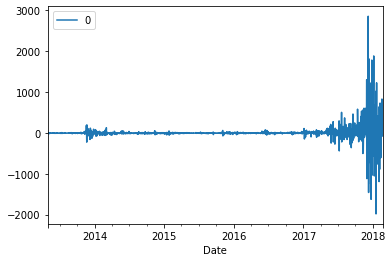

In [76]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

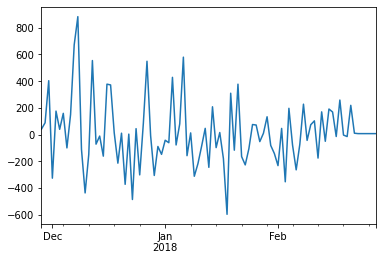

In [77]:
forecast=model_fit.predict(start='2017-11-28', end='2018-02-28')
forecast.plot()

In [85]:
forecast.head()

2017-11-28     40.426303
2017-11-29     88.246036
2017-11-30    403.153191
2017-12-01   -326.813134
2017-12-02    175.577218
Freq: D, dtype: float64

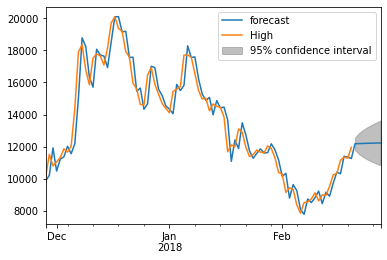

In [45]:

fig = model_fit.plot_predict(start='2017-11-28', end='2018-02-28')
fig.show()

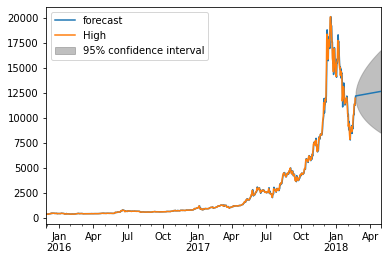

In [84]:
fig = model_fit.plot_predict(start='2015-11-28', end='2018-04-28')
fig.show()

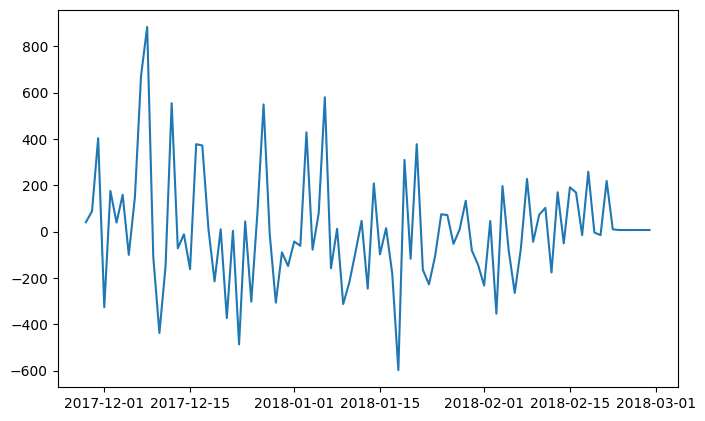

In [86]:
plt.figure(figsize=(8,5), dpi=100)

plt.plot(forecast)